In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("/Users/zeeshanhussain/Desktop/KPMG/airline2.csv")

df.head()
df.shape
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300249 entries, 0 to 300248
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Index             300249 non-null  int64  
 1   Airline           300249 non-null  object 
 2   Flight            300249 non-null  object 
 3   Source_city       300249 non-null  object 
 4   Departure_time    300249 non-null  object 
 5   Stops             300229 non-null  object 
 6   Arrival_day       300249 non-null  object 
 7   Destination_city  300249 non-null  object 
 8   Class             300249 non-null  object 
 9   Duration          300249 non-null  float64
 10  Days_left         300249 non-null  int64  
 11  Price             300223 non-null  float64
dtypes: float64(2), int64(2), object(8)
memory usage: 27.5+ MB


In [4]:
df[df.duplicated()]


,Index,Airline,Flight,Source_city,Departure_time,Stops,Arrival_day,Destination_city,Class,Duration,Days_left,Price
300200,127,GO_FIRST,G8-336,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.25,2,5954.0
300201,128,GO_FIRST,G8-346,Delhi,Evening,zero,Night,Mumbai,Economy,2.25,2,5954.0
300202,129,GO_FIRST,G8-330,Delhi,Night,zero,Night,Mumbai,Economy,2.25,2,5954.0
300203,130,GO_FIRST,G8-338,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.33,2,5954.0
300204,131,GO_FIRST,G8-323,Delhi,Evening,zero,Night,Mumbai,Economy,2.33,2,5954.0
300205,132,Indigo,0.00E+00,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.17,2,5955.0
300206,133,Indigo,0.00E+00,Delhi,Evening,zero,Evening,Mumbai,Economy,2.17,2,5955.0
300207,134,Indigo,0.00E+00,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,2,5955.0
300208,135,Indigo,6.00E-218,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,2,5955.0
300209,136,Indigo,0.00E+00,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.25,2,5955.0


In [5]:
df.index.duplicated().sum()


np.int64(0)

In [5]:
df.isnull().sum().sum()


np.int64(46)

In [7]:
df["Price"].skew()


np.float64(1.0616970246388817)

In [9]:
df["Stops"].fillna(df["Stops"].mode()[0], inplace=True)


In [11]:
df["Price"] = df["Price"].fillna(df["Price"].median())


In [21]:
df = df.drop_duplicates()
df = df.copy()


In [22]:
df.duplicated().sum()


np.int64(0)

In [23]:
df.isnull().sum().sum()


np.int64(0)

In [24]:
df.columns = df.columns.str.strip().str.lower()


In [25]:
df.loc[:, "refundable"] = df["class"].apply(
    lambda x: "Yes" if x == "business" else "No"
)


In [26]:
df.loc[:, "pre_booked_meal"] = np.where(
    df["class"] == "business", "Yes", "No"
)


In [27]:
df.describe()

,index,duration,days_left,price
count,300200.000000,300200.000000,300200.000000,300200.000000
mean,150099.499817,12.221310,26.005120,20887.688038
std,86660.420060,7.191992,13.560615,22696.991293
min,0.000000,0.830000,1.000000,1105.000000
25%,75049.750000,6.830000,15.000000,4783.000000
50%,150099.500000,11.250000,26.000000,7425.000000
75%,225149.250000,16.170000,38.000000,42521.000000
max,300199.000000,49.830000,49.000000,123071.000000


In [28]:
df.describe(include="all")


,index,airline,flight,source_city,departure_time,stops,arrival_day,destination_city,class,duration,days_left,price,refundable,pre_booked_meal
count,300200.000000,300200,300200,300200,300200,300200,300200,300200,300200,300200.000000,300200.000000,300200.000000,300200,300200
unique,NaN,6,939,6,6,3,6,6,2,NaN,NaN,NaN,1,1
top,NaN,Vistara,0.00E+00,Delhi,Morning,one,Night,Mumbai,Economy,NaN,NaN,NaN,No,No
freq,NaN,127876,38210,61383,71157,250913,91551,59100,206710,NaN,NaN,NaN,300200,300200
mean,150099.499817,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.221310,26.005120,20887.688038,NaN,NaN
std,86660.420060,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.191992,13.560615,22696.991293,NaN,NaN
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.830000,1.000000,1105.000000,NaN,NaN
25%,75049.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.830000,15.000000,4783.000000,NaN,NaN
50%,150099.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.250000,26.000000,7425.000000,NaN,NaN
75%,225149.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.170000,38.000000,42521.000000,NaN,NaN


In [29]:
df.describe(include="all")


,index,airline,flight,source_city,departure_time,stops,arrival_day,destination_city,class,duration,days_left,price,refundable,pre_booked_meal
count,300200.000000,300200,300200,300200,300200,300200,300200,300200,300200,300200.000000,300200.000000,300200.000000,300200,300200
unique,NaN,6,939,6,6,3,6,6,2,NaN,NaN,NaN,1,1
top,NaN,Vistara,0.00E+00,Delhi,Morning,one,Night,Mumbai,Economy,NaN,NaN,NaN,No,No
freq,NaN,127876,38210,61383,71157,250913,91551,59100,206710,NaN,NaN,NaN,300200,300200
mean,150099.499817,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.221310,26.005120,20887.688038,NaN,NaN
std,86660.420060,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.191992,13.560615,22696.991293,NaN,NaN
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.830000,1.000000,1105.000000,NaN,NaN
25%,75049.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.830000,15.000000,4783.000000,NaN,NaN
50%,150099.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.250000,26.000000,7425.000000,NaN,NaN
75%,225149.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.170000,38.000000,42521.000000,NaN,NaN


In [30]:
import os
os.listdir()


['.DS_Store',
 'Untitled.ipynb',
 'airline2.csv',
 'airline1.csv',
 'airline.csv',
 '.ipynb_checkpoints',
 'Untitled copy.ipynb']

In [31]:
df.to_csv("airline2.csv", index=False)

In [33]:
df.loc[:, "pre_booked_meal"] = np.where(
    df["arrival_day"].isin(["Night", "Afternoon"]),
    "Yes",
    "No"
)

In [34]:
df.head()

,index,airline,flight,source_city,departure_time,stops,arrival_day,destination_city,class,duration,days_left,price,refundable,pre_booked_meal
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953.0,No,Yes
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953.0,No,No
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956.0,No,No
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955.0,No,Yes
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955.0,No,No


In [37]:
df.loc[:, "refundable"] = np.where(
    df["days_left"] > 6,
    "Yes",
    "No"
)


In [38]:
df[["days_left", "refundable"]].head()


,days_left,refundable
0,1,No
1,1,No
2,1,No
3,1,No
4,1,No


In [41]:
avg_ticket_price = df["price"].mean()


In [42]:
min_ticket_price = df["price"].min()


In [43]:
max_ticket_price = df["price"].max()


In [44]:
avg_price_by_airline = (
    df.groupby("airline")["price"]
    .mean()
    .sort_values(ascending=False)
)


In [45]:
flights_per_airline = (
    df["airline"]
    .value_counts()
)


In [46]:
market_share = df["airline"].value_counts(normalize=True) * 100


In [48]:
stops_ratio = df["stops"].value_counts(normalize=True) * 100


In [49]:
avg_flight_duration = df["duration"].mean()


In [50]:
avg_duration_by_stops = (
    df.groupby("stops")["duration"]
    .mean()
)


In [51]:
avg_price_by_departure = (
    df.groupby("departure_time")["price"]
    .mean()
    .sort_values(ascending=False)
)


In [54]:
df["cost_per_hour"] = df["price"] / df["duration"]

avg_cost_per_hour = df["cost_per_hour"].mean()


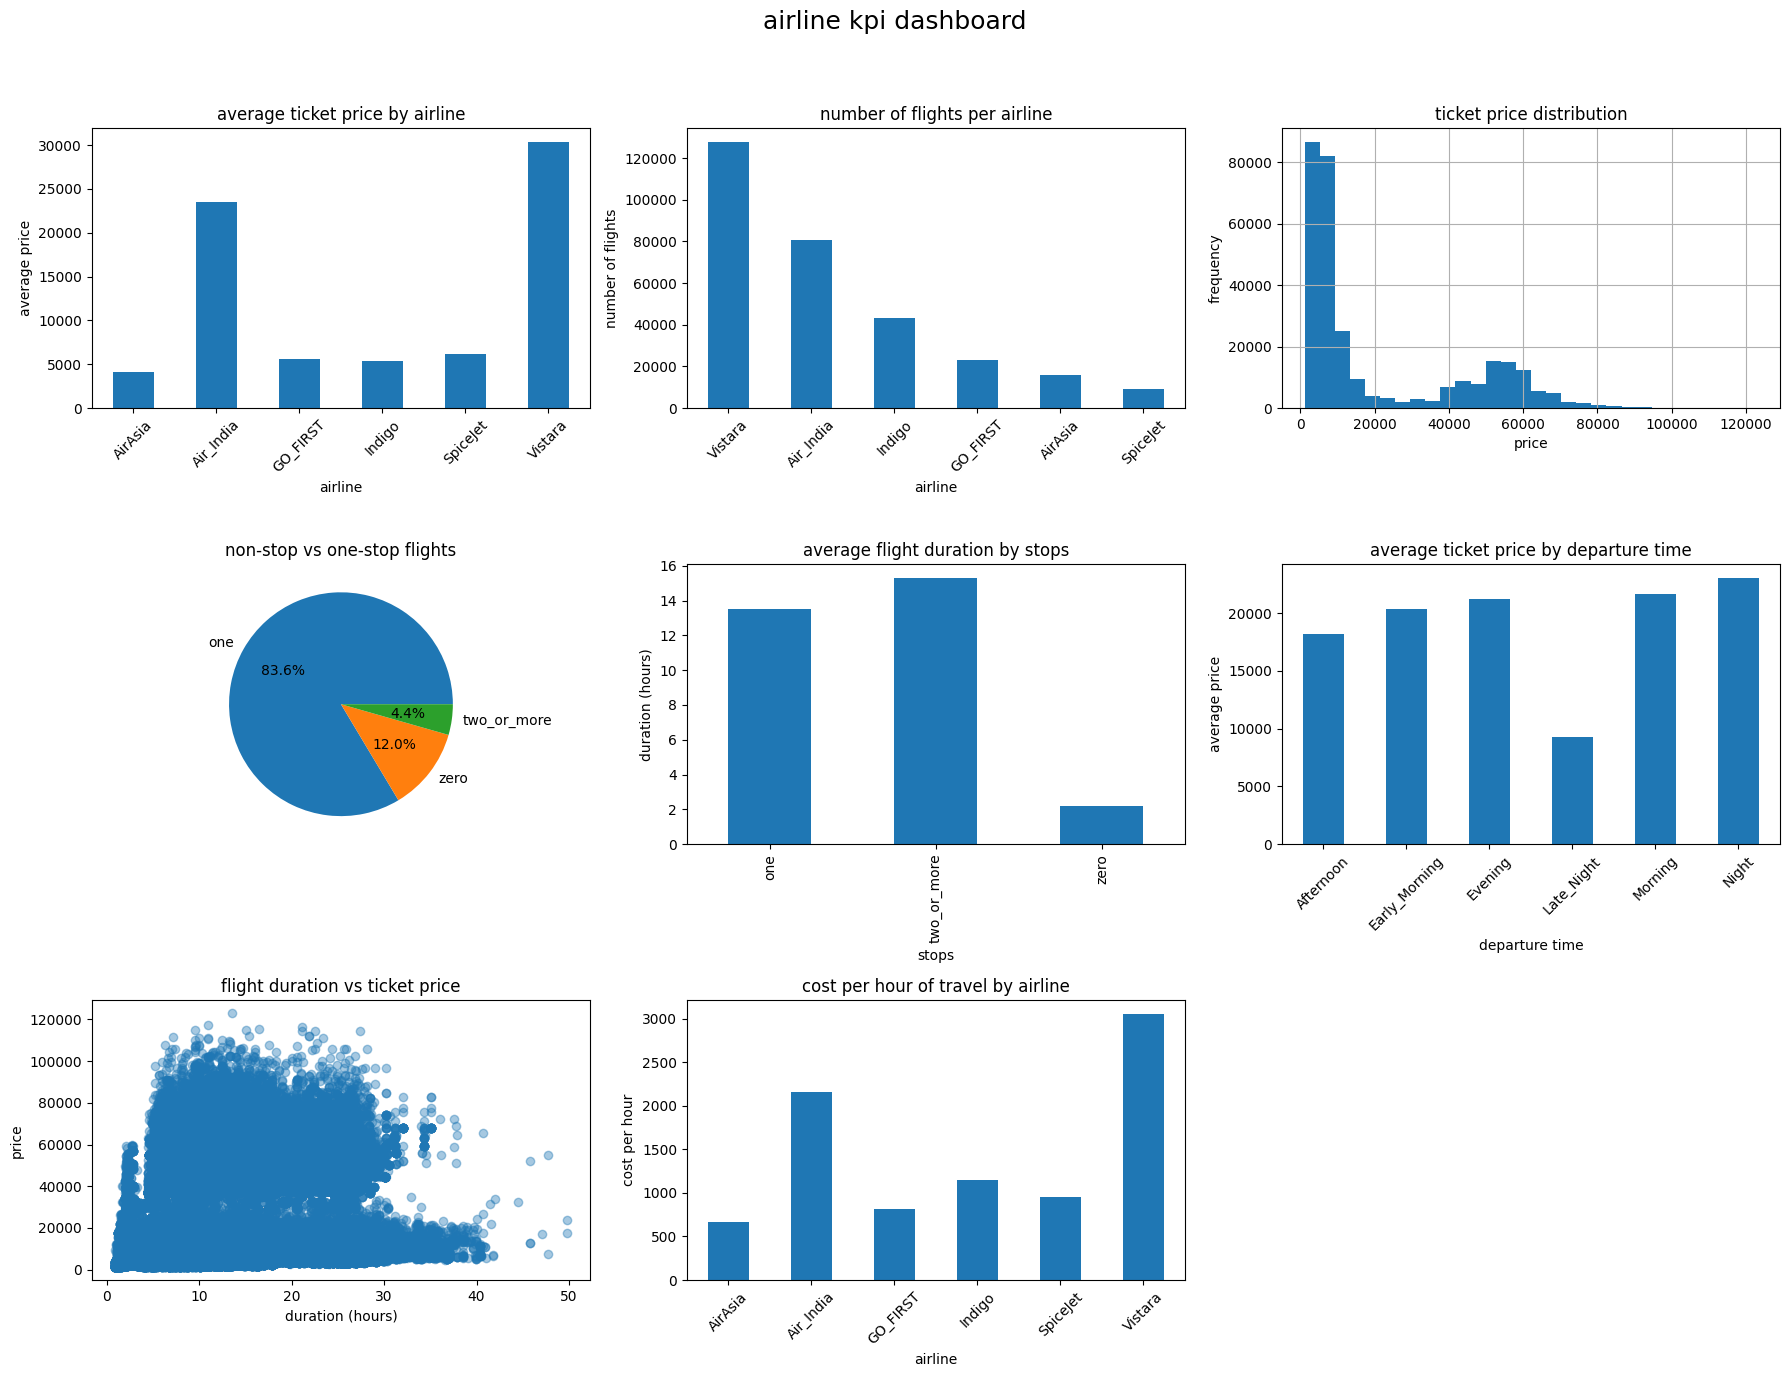

In [61]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 14))

# 1 average ticket price by airline
plt.subplot(3, 3, 1)
df.groupby("airline")["price"].mean().plot(kind="bar")
plt.title("average ticket price by airline")
plt.xlabel("airline")
plt.ylabel("average price")
plt.xticks(rotation=45)

# 2 number of flights per airline
plt.subplot(3, 3, 2)
df["airline"].value_counts().plot(kind="bar")
plt.title("number of flights per airline")
plt.xlabel("airline")
plt.ylabel("number of flights")
plt.xticks(rotation=45)

# 3 ticket price distribution
plt.subplot(3, 3, 3)
df["price"].hist(bins=30)
plt.title("ticket price distribution")
plt.xlabel("price")
plt.ylabel("frequency")

# 4 non-stop vs one-stop flight ratio
plt.subplot(3, 3, 4)
df["stops"].value_counts().plot(kind="pie", autopct="%1.1f%%")
plt.title("non-stop vs one-stop flights")
plt.ylabel("")

# 5 average flight duration by stops
plt.subplot(3, 3, 5)
df.groupby("stops")["duration"].mean().plot(kind="bar")
plt.title("average flight duration by stops")
plt.xlabel("stops")
plt.ylabel("duration (hours)")

# 6 average ticket price by departure time
plt.subplot(3, 3, 6)
df.groupby("departure_time")["price"].mean().plot(kind="bar")
plt.title("average ticket price by departure time")
plt.xlabel("departure time")
plt.ylabel("average price")
plt.xticks(rotation=45)

# 7 duration vs ticket price
plt.subplot(3, 3, 7)
plt.scatter(df["duration"], df["price"], alpha=0.4)
plt.title("flight duration vs ticket price")
plt.xlabel("duration (hours)")
plt.ylabel("price")

# 8 cost per hour of travel by airline
plt.subplot(3, 3, 8)
(df["price"] / df["duration"]).groupby(df["airline"]).mean().plot(kind="bar")
plt.title("cost per hour of travel by airline")
plt.xlabel("airline")
plt.ylabel("cost per hour")
plt.xticks(rotation=45)

# dashboard title & layout
plt.suptitle("airline kpi dashboard", fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


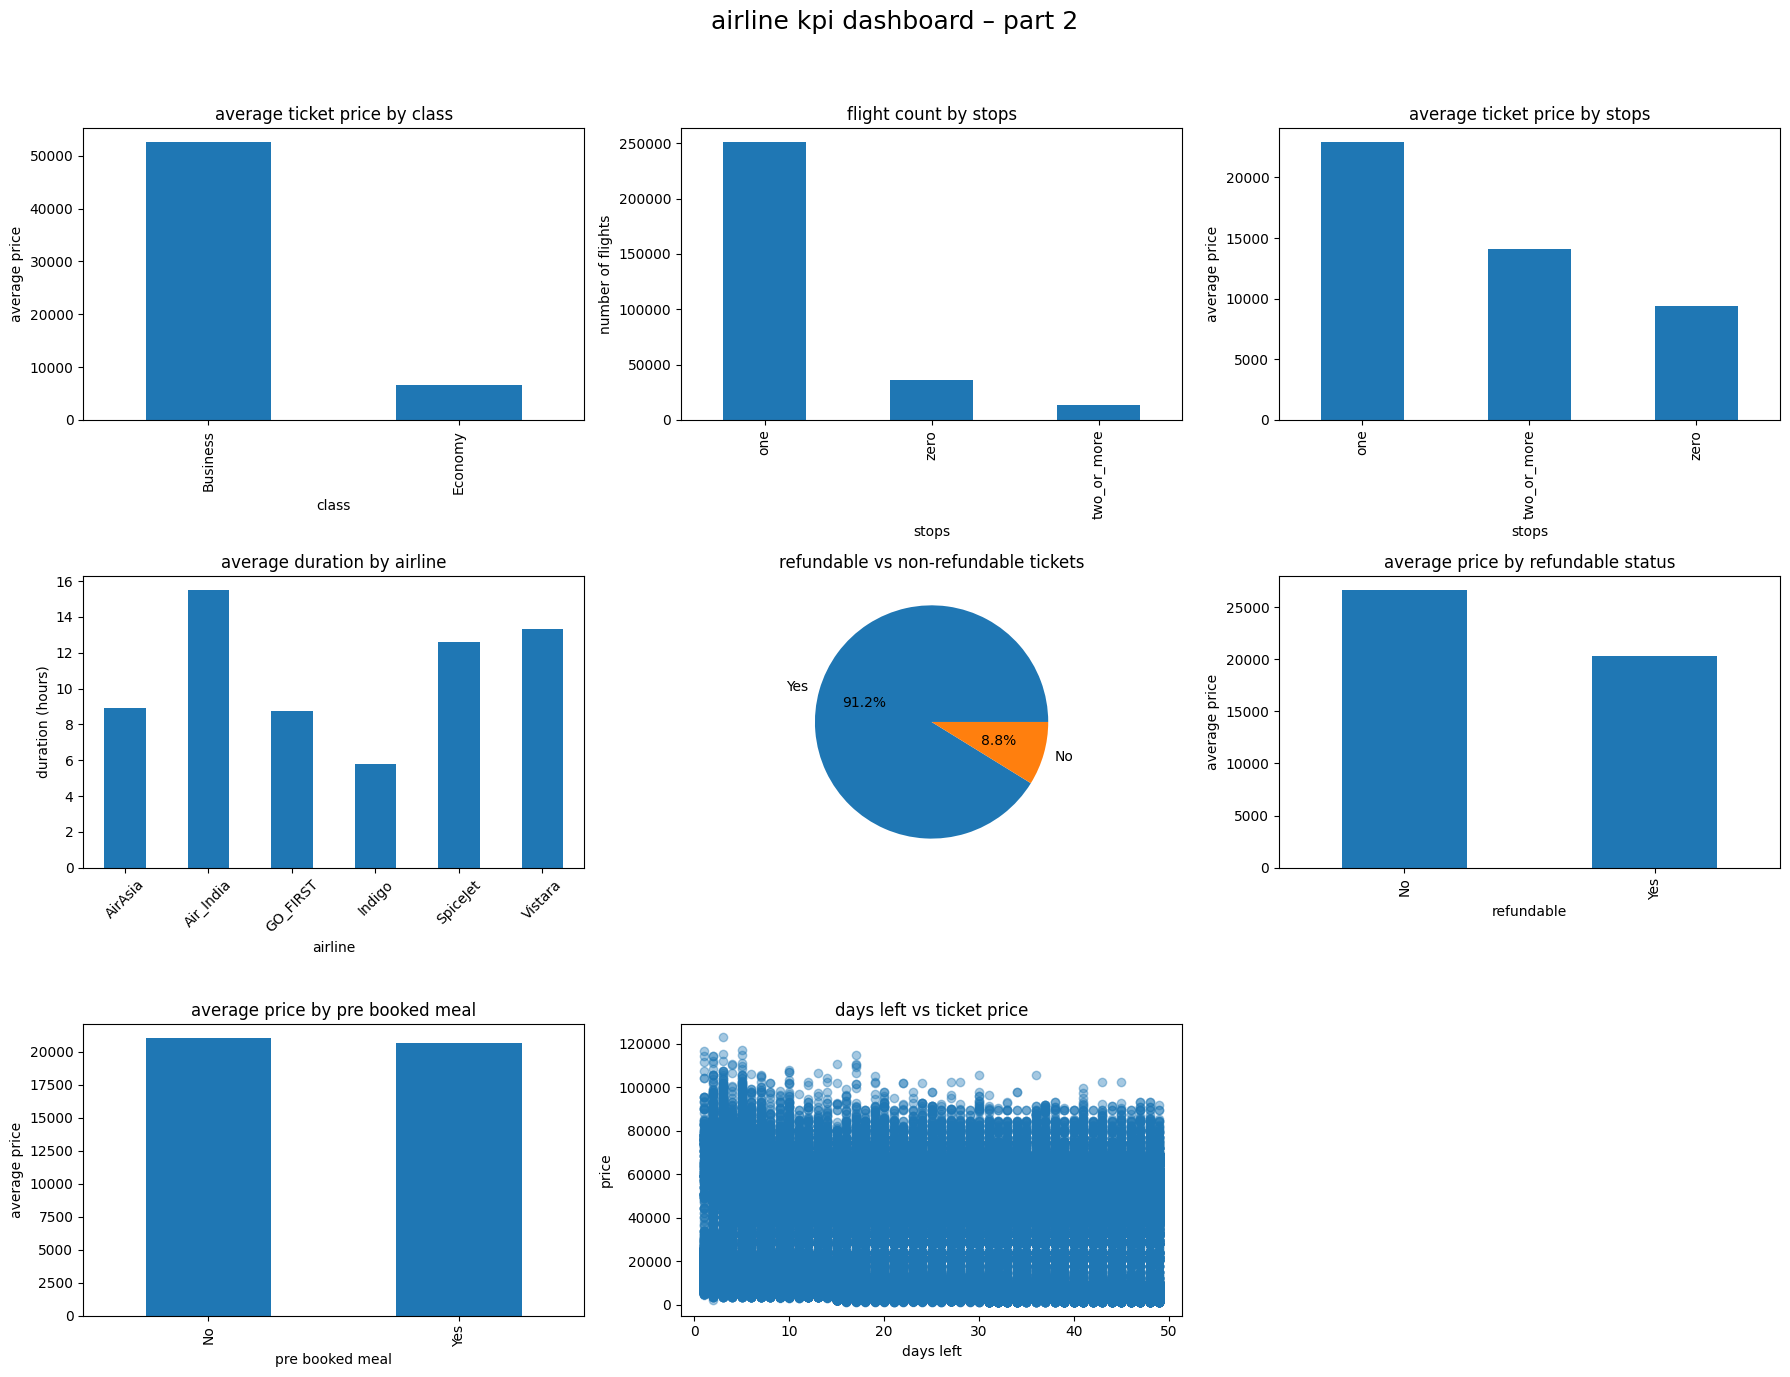

In [62]:
plt.figure(figsize=(18, 14))

# 1 average price by class
plt.subplot(3, 3, 1)
df.groupby("class")["price"].mean().plot(kind="bar")
plt.title("average ticket price by class")
plt.xlabel("class")
plt.ylabel("average price")

# 2 flight count by stops
plt.subplot(3, 3, 2)
df["stops"].value_counts().plot(kind="bar")
plt.title("flight count by stops")
plt.xlabel("stops")
plt.ylabel("number of flights")

# 3 average price by stops
plt.subplot(3, 3, 3)
df.groupby("stops")["price"].mean().plot(kind="bar")
plt.title("average ticket price by stops")
plt.xlabel("stops")
plt.ylabel("average price")

# 4 average duration by airline
plt.subplot(3, 3, 4)
df.groupby("airline")["duration"].mean().plot(kind="bar")
plt.title("average duration by airline")
plt.xlabel("airline")
plt.ylabel("duration (hours)")
plt.xticks(rotation=45)

# 5 refundable vs non-refundable count
plt.subplot(3, 3, 5)
df["refundable"].value_counts().plot(kind="pie", autopct="%1.1f%%")
plt.title("refundable vs non-refundable tickets")
plt.ylabel("")

# 6 average price by refundable status
plt.subplot(3, 3, 6)
df.groupby("refundable")["price"].mean().plot(kind="bar")
plt.title("average price by refundable status")
plt.xlabel("refundable")
plt.ylabel("average price")

# 7 pre booked meal vs price
plt.subplot(3, 3, 7)
df.groupby("pre_booked_meal")["price"].mean().plot(kind="bar")
plt.title("average price by pre booked meal")
plt.xlabel("pre booked meal")
plt.ylabel("average price")

# 8 days left vs price (booking behavior)
plt.subplot(3, 3, 8)
plt.scatter(df["days_left"], df["price"], alpha=0.4)
plt.title("days left vs ticket price")
plt.xlabel("days left")
plt.ylabel("price")

# dashboard layout
plt.suptitle("airline kpi dashboard – part 2", fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()